# 2 第二章：数据可视化
开始之前，导入numpy、pandas包和数据  
导入result.csv这个文件

**%matplotlib作用**

> 是在使用jupyter notebook 或者 jupyter qtconsole的时候，才会经常用到%matplotlib，  
也就是说那一份代码可能就是别人使用jupyter notebook 或者 jupyter qtconsole进行编辑的。  
而%matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，  
或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。  

链接：https://www.jianshu.com/p/2dda5bb8ce7d

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('result.csv')
df.head()

# text = pd.read_csv(r'result.csv')
# text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化
【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

折线图，柱形图，饼图，以及各种叫不上名字的图，被广泛应用于大数据分析，数值分析，股票走势等地方

### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

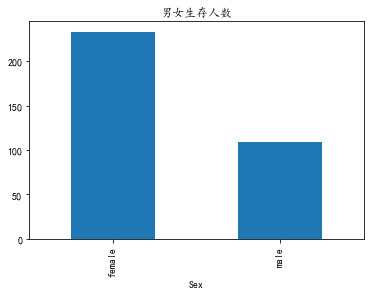

In [2]:
#设置字体为楷体
plt.rcParams['font.sans-serif'] = ['KaiTi']
data = df.groupby('Sex')['Survived'].sum()
data.plot(kind='bar',title='男女生存人数')
plt.show()

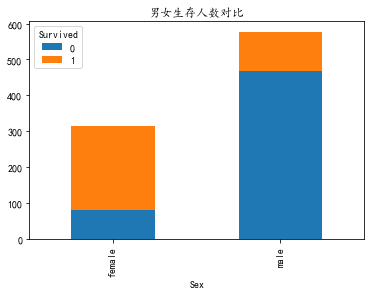

In [3]:
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
data = df.groupby(['Sex','Survived'])['Survived'].count().unstack()
data.plot.bar(stacked=True,title='男女生存人数对比')

plt.show()

### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）
【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

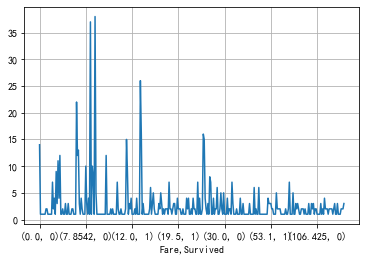

In [4]:
gourp_fare = df.groupby(['Fare'])['Survived'].value_counts()
gourp_fare.plot(grid=True)
plt.show()

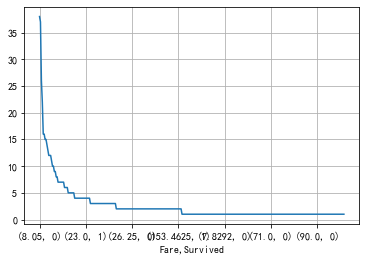

In [5]:
gourp_fare = df.groupby(['Fare'])['Survived'].value_counts()
g = gourp_fare.sort_values(ascending=False)  # by指定按哪列排序。ascending表示是否升序
g.plot(grid=True)
plt.show()

### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

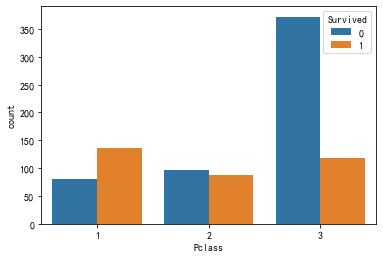

In [11]:
import seaborn as sns
pclass_survived = df.groupby(['Pclass'])['Survived'].value_counts()
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

通过数据，让我比较直观的感受到了数据的分布，更容易感受到这些数据之间的差距

### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

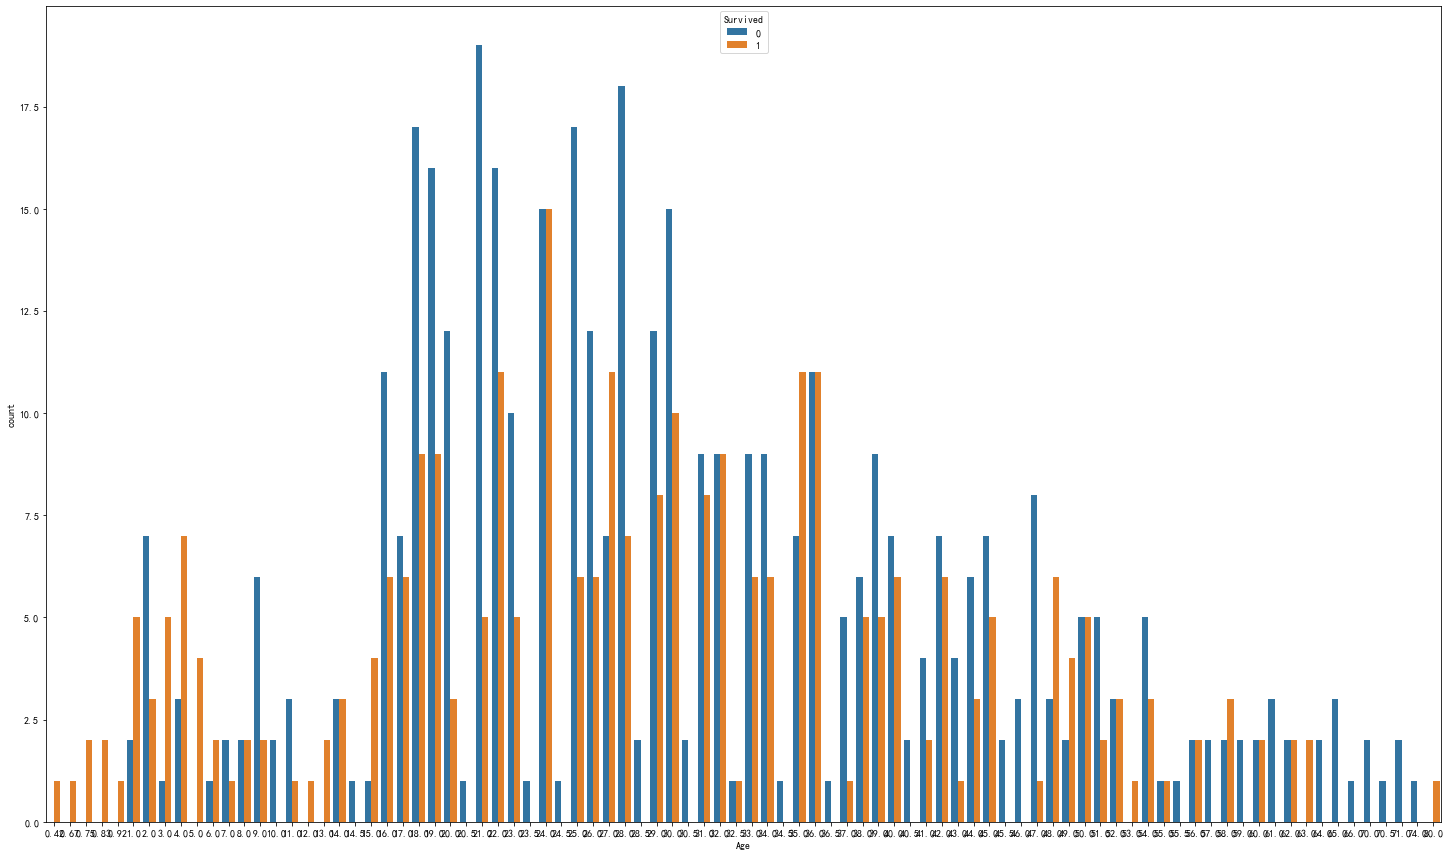

In [52]:
group_age = df.groupby(['Age'])['Survived'].value_counts()
plt.figure(figsize=(25,15))
sns.countplot(x="Age", hue="Survived", data=df)
plt.show()

### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

E:\my_app\anoconda\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\my_app\anoconda\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\my_app\anoconda\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\my_app\anoconda\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\my_app\anoconda\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\my_app\anoconda\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SI

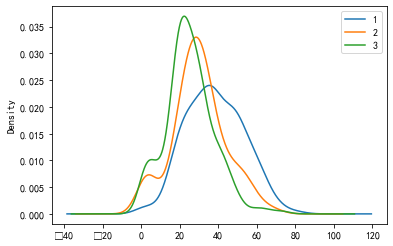

In [66]:

df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.legend((1,2,3),loc="best")
plt.show()